In [15]:
import pandas as pd
data_2019 = pd.read_excel('Bangalore Schools 2019.xlsx')
data_2020 = pd.read_excel('Bangalore Schools 2020.xlsx')
data_2021 = pd.read_excel('Bangalore Schools 2021.xlsx')

In [16]:
data_2019.columns

Index(['Student Roll', 'Student Name', 'Hindi', 'English', 'Mathematics',
       'Physics', 'Chemistry', 'Biology', 'History', 'Geography', 'Civics',
       'Computer Science', 'Physical Education'],
      dtype='object')

/opt/conda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


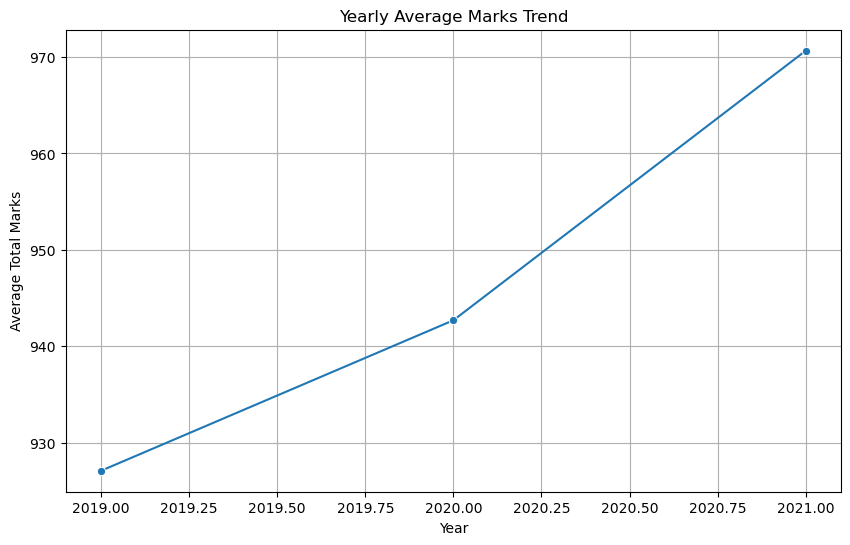

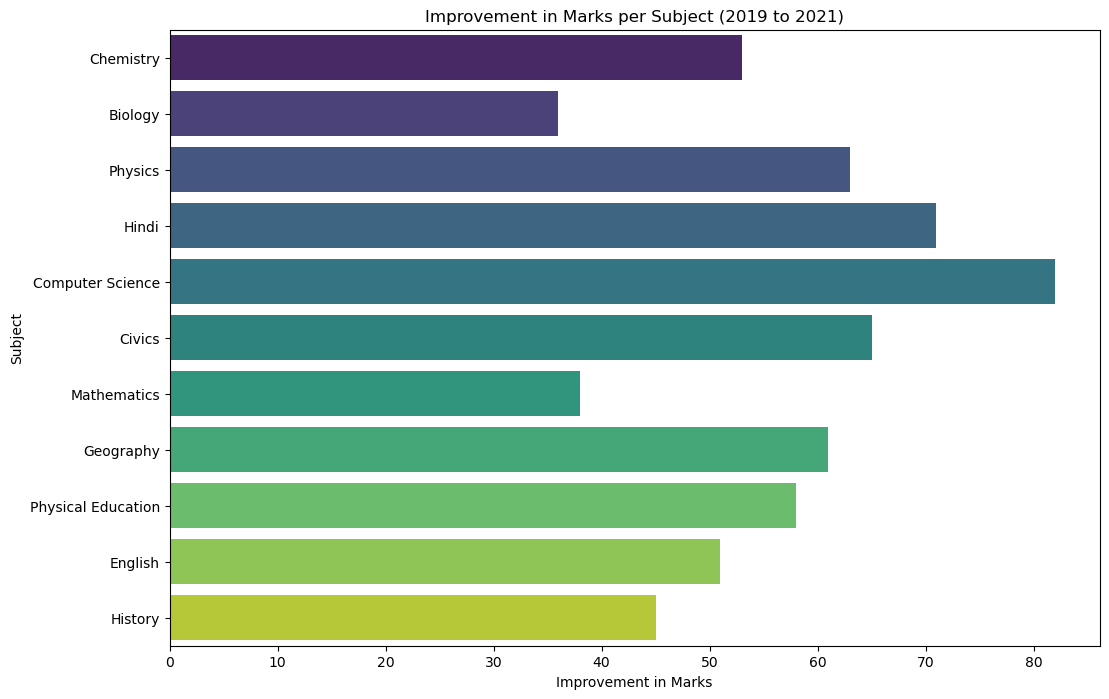

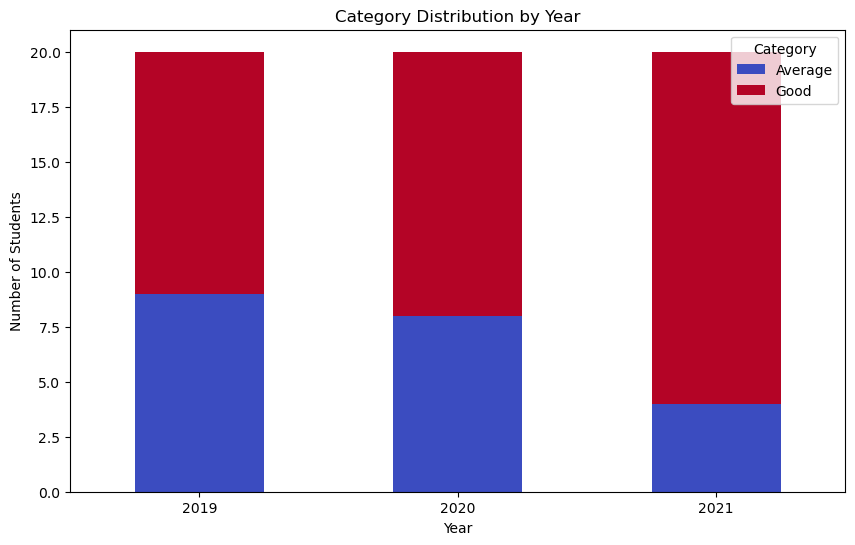

/opt/conda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


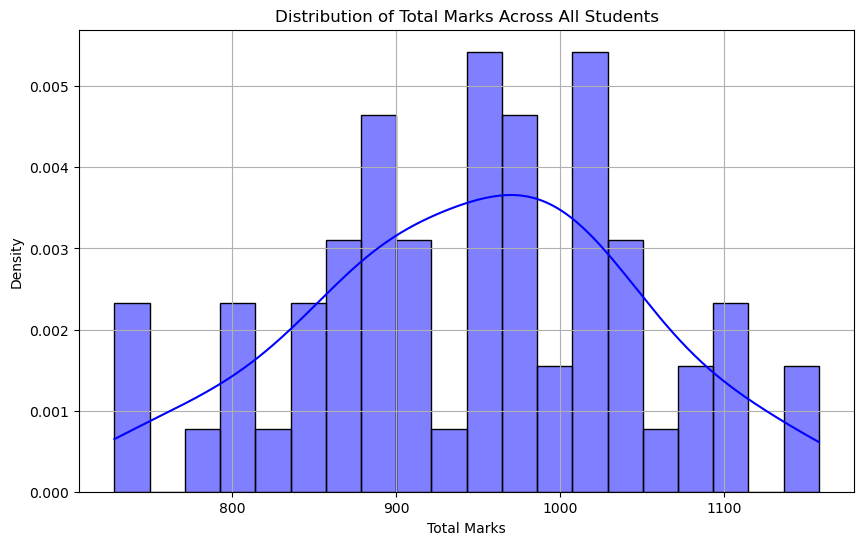

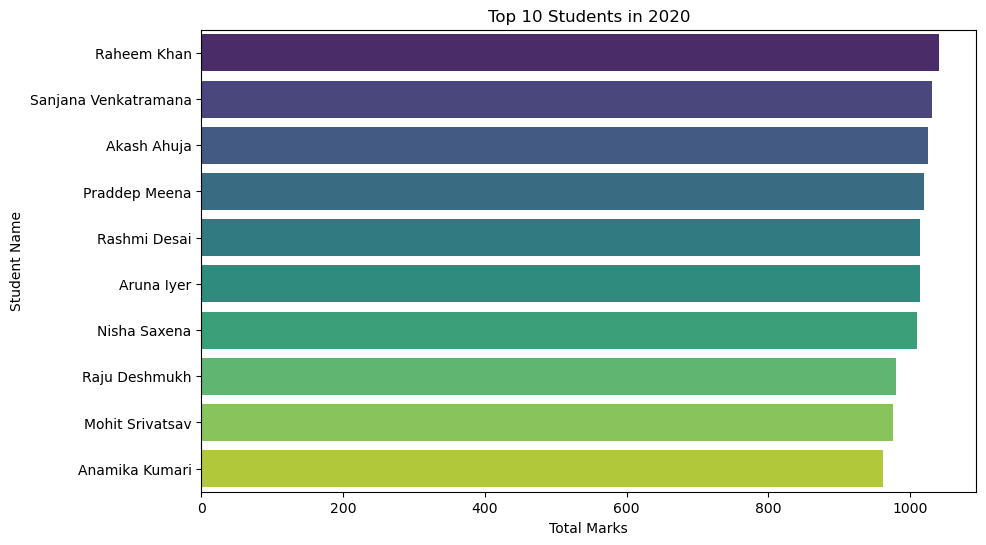

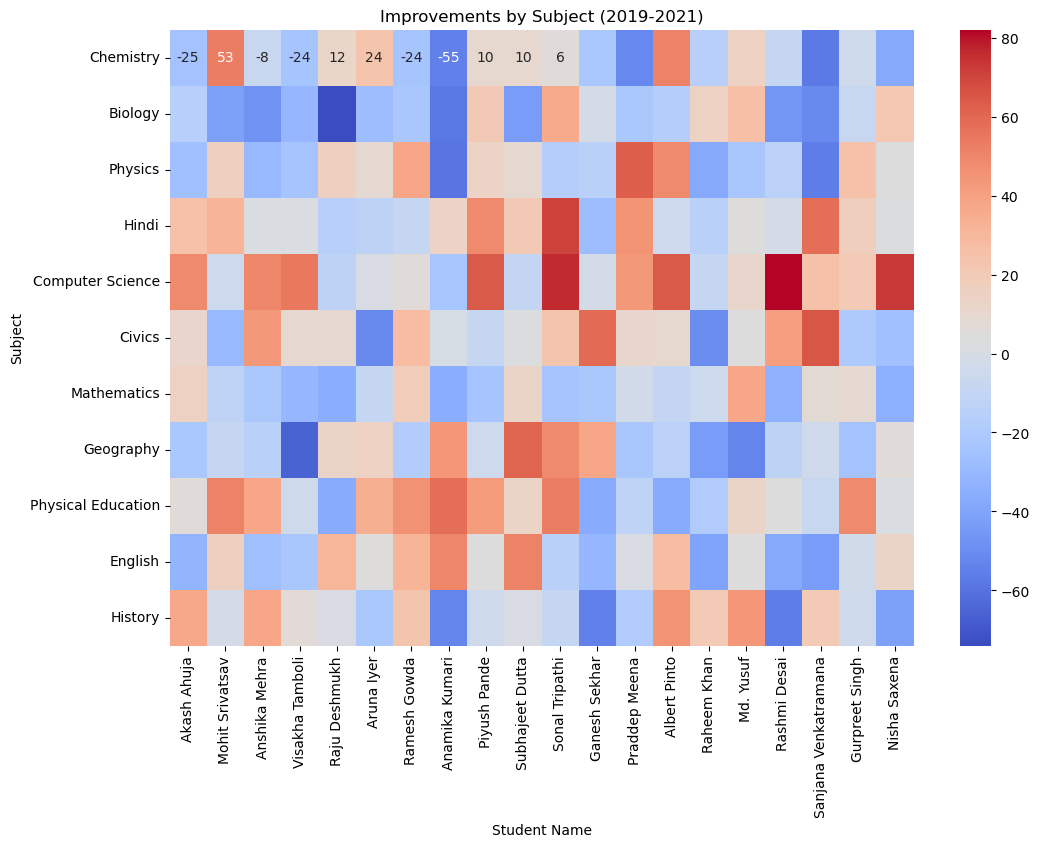

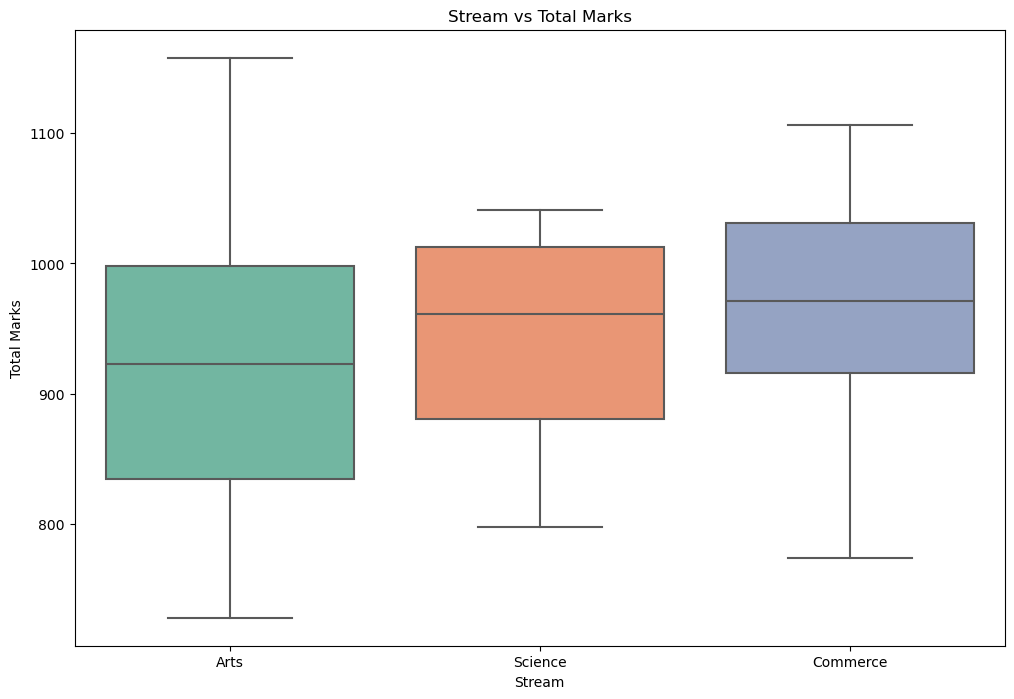

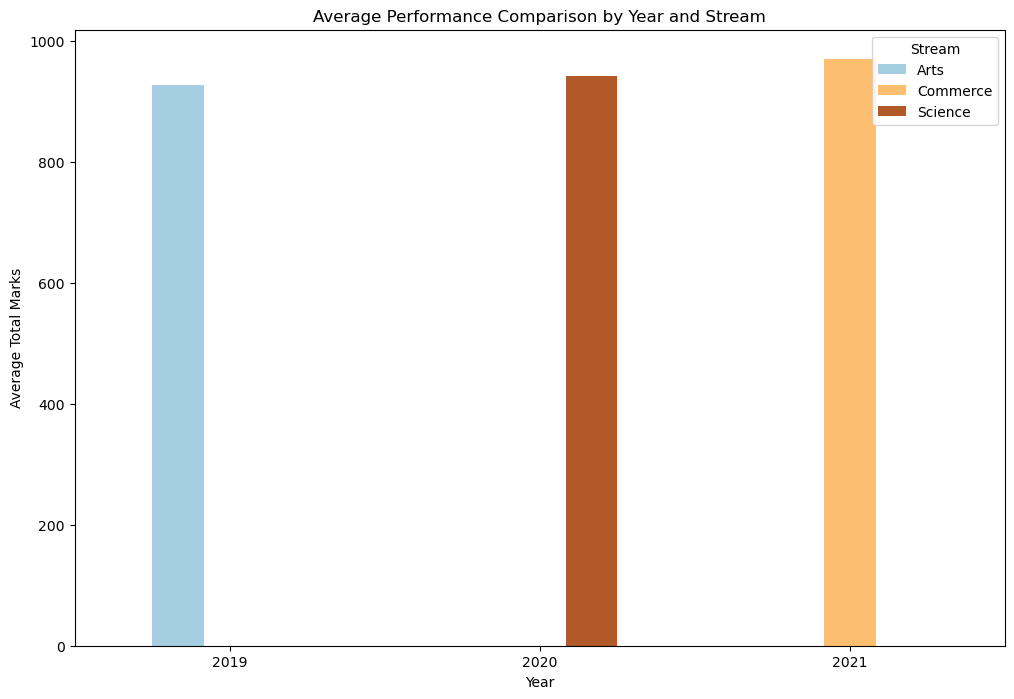


--- Key Results ---
Top Performer                                           10th Rank in 2020 Best Stream  Best Year for Performance                                      Performance Trend (2019-2021)
Raju Deshmukh     Student Name  Total Marks
2  Anshika Mehra          958    Commerce                       2019 Year
2020    15.60
2021    27.95
Name: Total Marks, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_2019 = pd.read_excel('Bangalore Schools 2019.xlsx')
data_2020 = pd.read_excel('Bangalore Schools 2020.xlsx')
data_2021 = pd.read_excel('Bangalore Schools 2021.xlsx')

# Add Year column
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021

# Combine datasets
data = pd.concat([data_2019, data_2020, data_2021], ignore_index=True)

# Subject streams
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']

# 1. Top performer across 3 years
data['Total Marks'] = data.loc[:, arts_subjects + science_subjects + commerce_subjects].sum(axis=1)
top_performer = data.groupby('Student Name')['Total Marks'].sum().idxmax()

# 2. Rank students in 2020
data_2020['Total Marks'] = data_2020.loc[:, arts_subjects + science_subjects + commerce_subjects].sum(axis=1)
data_2020['Rank'] = data_2020['Total Marks'].rank(ascending=False, method='dense')
rank_10 = data_2020[data_2020['Rank'] == 10][['Student Name', 'Total Marks']]

# 3. Highest improvement per subject
improvements = []
for subject in set(arts_subjects + science_subjects + commerce_subjects):
    try:
        improvements_2019 = data[data['Year'] == 2019].set_index('Student Name')[subject].dropna()
        improvements_2021 = data[data['Year'] == 2021].set_index('Student Name')[subject].dropna()
        
        common_students = improvements_2019.index.intersection(improvements_2021.index)
        improvement_diff = improvements_2021.loc[common_students] - improvements_2019.loc[common_students]
        
        if not improvement_diff.empty:
            best_improvement_student = improvement_diff.idxmax()
            best_improvement_value = improvement_diff.max()
            improvements.append({'Subject': subject, 'Student Name': best_improvement_student, 'Improvement': best_improvement_value})
    except KeyError:
        continue

# 4. Best stream based on marks
stream_scores = {}
for stream, subjects in zip(['Arts', 'Science', 'Commerce'], [arts_subjects, science_subjects, commerce_subjects]):
    available_subjects = [subject for subject in subjects if subject in data.columns]
    stream_scores[stream] = data[available_subjects].mean().sum()
best_stream = max(stream_scores, key=stream_scores.get)

# 5. Categorize students
def categorize_marks(marks):
    if marks <= 20: return 'Very Poor'
    elif marks <= 40: return 'Poor'
    elif marks <= 60: return 'Average'
    elif marks <= 80: return 'Good'
    else: return 'Very Good'

data['Category'] = data.loc[:, arts_subjects + science_subjects + commerce_subjects].apply(pd.to_numeric, errors='coerce').mean(axis=1).apply(categorize_marks)

# 6. Best year for performance
category_count = data.groupby(['Year', 'Category']).size().unstack(fill_value=0)
good_very_good = category_count[['Good', 'Very Good']].sum(axis=1) if 'Good' in category_count.columns and 'Very Good' in category_count.columns else category_count.sum(axis=1)
best_year = good_very_good.idxmax()

# 7. Overall performance trend
yearly_avg_marks = data.groupby('Year')['Total Marks'].mean()
performance_trend = yearly_avg_marks.diff().dropna()

# Plotting Results

# 1. Performance Trend Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_avg_marks.index, y=yearly_avg_marks.values, marker='o')
plt.title('Yearly Average Marks Trend')
plt.xlabel('Year')
plt.ylabel('Average Total Marks')
plt.grid(True)
plt.show()

# 2. Improvement per Subject Plot
improvement_df = pd.DataFrame(improvements)
plt.figure(figsize=(12, 8))
sns.barplot(x='Improvement', y='Subject', data=improvement_df, palette='viridis')
plt.title('Improvement in Marks per Subject (2019 to 2021)')
plt.xlabel('Improvement in Marks')
plt.ylabel('Subject')
plt.show()

# 3. Category Distribution by Year
category_dist = data.groupby(['Year', 'Category']).size().unstack(fill_value=0)
category_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Category Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

# Display Results in Table format
results_table = pd.DataFrame({
    'Top Performer': [top_performer],
    '10th Rank in 2020': [rank_10],
    'Best Stream': [best_stream],
    'Best Year for Performance': [best_year],
    'Performance Trend (2019-2021)': [performance_trend]
})

# Plotting Additional Visualizations

# 1. Student Performance Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['Total Marks'], kde=True, bins=20, color='blue', stat='density')
plt.title('Distribution of Total Marks Across All Students')
plt.xlabel('Total Marks')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# 2. Top 10 Students in 2020 (Bar Plot)
top_10_2020 = data_2020.sort_values('Total Marks', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Marks', y='Student Name', data=top_10_2020, palette='viridis')
plt.title('Top 10 Students in 2020')
plt.xlabel('Total Marks')
plt.ylabel('Student Name')
plt.show()

# Create heatmap from the improvement matrix
improvement_df = pd.DataFrame(improvement_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(improvement_df.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Improvements by Subject (2019-2021)')
plt.xlabel('Student Name')
plt.ylabel('Subject')
plt.show()

# 4. Stream vs Performance (Box Plot)
data['Stream'] = data['Year'].apply(lambda x: 'Arts' if x == 2019 else ('Science' if x == 2020 else 'Commerce'))  # Assuming stream based on year for demo
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stream', y='Total Marks', data=data, palette='Set2')
plt.title('Stream vs Total Marks')
plt.xlabel('Stream')
plt.ylabel('Total Marks')
plt.show()

# 5. Performance Comparison (Yearly by Stream - Bar Plot)
# Group by year and stream and calculate average marks
stream_performance = data.groupby(['Year', 'Stream'])['Total Marks'].mean().unstack()
stream_performance.plot(kind='bar', figsize=(12, 8), colormap='Paired')
plt.title('Average Performance Comparison by Year and Stream')
plt.xlabel('Year')
plt.ylabel('Average Total Marks')
plt.xticks(rotation=0)
plt.show()



print("\n--- Key Results ---")
print(results_table.to_string(index=False))

